<a href="https://colab.research.google.com/github/UtsavRao/PRODIGY_DS_05/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [5]:
df


,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [6]:
df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [7]:
df.isna().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Top Operators Accounting for Crashes.

Text(0, 0.5, 'Top Operators')

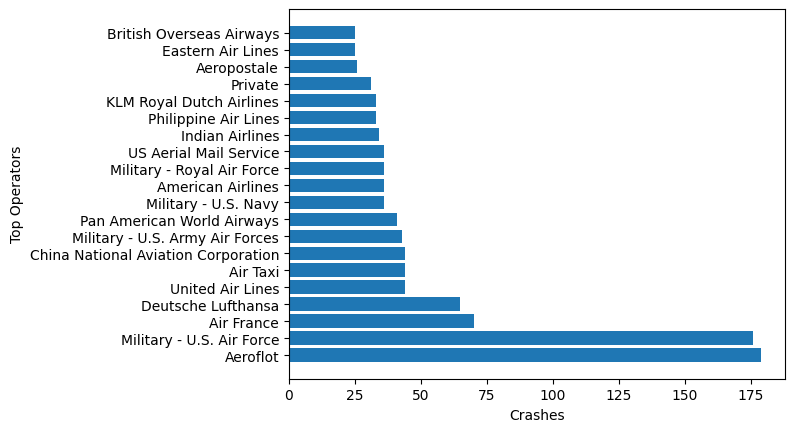

In [8]:
operator_count=df.groupby(['Operator']).count()['index']
operator_count=pd.DataFrame(operator_count).dropna(axis='rows')
operator_count=operator_count.rename(columns={'index':'count'})
operator_count=operator_count.sort_values("count",ascending=False)
op_count_x=np.array(operator_count.index)
op_count_y=np.array(operator_count['count'])


plt.barh(op_count_x[:20],op_count_y[:20])
plt.xlabel('Crashes')
plt.ylabel('Top Operators')

Fatalities By Operators.

<ipython-input-9-e721917fe4ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  op_fatalities=pd.DataFrame(df.groupby(['Operator']).sum()['Fatalities'])


Text(0.5, 0, 'Fatalities')

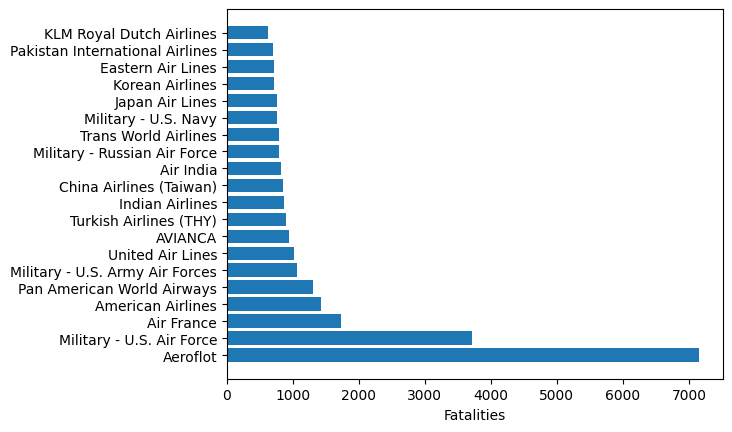

In [9]:
op_fatalities=pd.DataFrame(df.groupby(['Operator']).sum()['Fatalities'])
op_fatalities=op_fatalities.sort_values("Fatalities",ascending=False)
op_fatalities_x=op_fatalities.index
op_fatalities_y=op_fatalities['Fatalities']

plt.barh(op_fatalities_x[:20],op_fatalities_y[:20])
plt.xlabel('Fatalities')

Crashes By Route

Text(0.5, 0, 'Crashes')

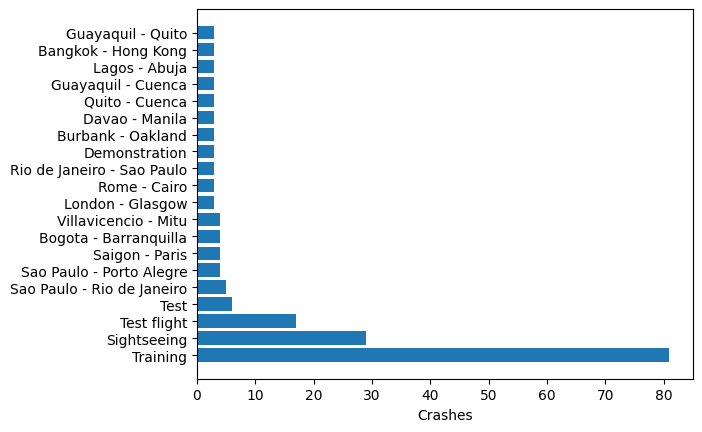

In [10]:
route_count=df.groupby(['Route']).count().sort_values('index',ascending=False)
rc_x=np.array(route_count.index)
rc_y=np.array(route_count['index'])
plt.barh(rc_x[:20],rc_y[:20])
plt.xlabel('Crashes')

Fatalities By Route

<ipython-input-11-f6969e850450>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  route_fatalities=df.groupby(['Route']).sum().drop(['index','Ground'],axis='columns')


Text(0.5, 0, 'Passengers')

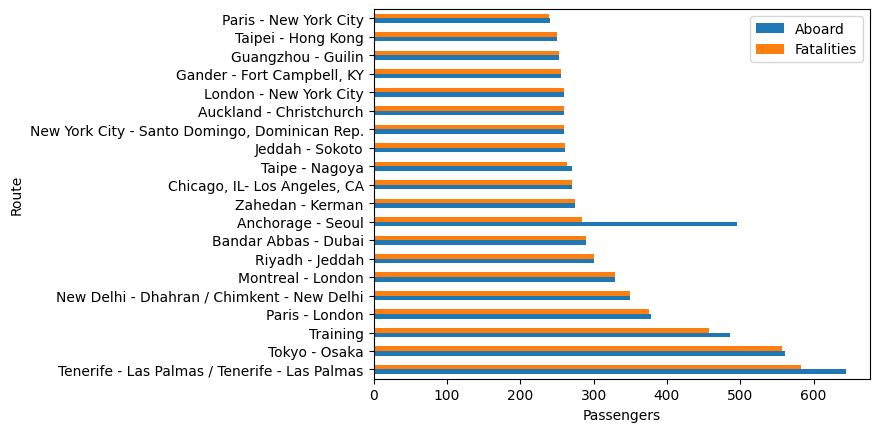

In [11]:
route_fatalities=df.groupby(['Route']).sum().drop(['index','Ground'],axis='columns')
route_fatalities=route_fatalities.sort_values('Fatalities',ascending=False)
route_fatalities[:20].plot(kind='barh')
plt.xlabel('Passengers')

In [ ]:
Year Wise Crash

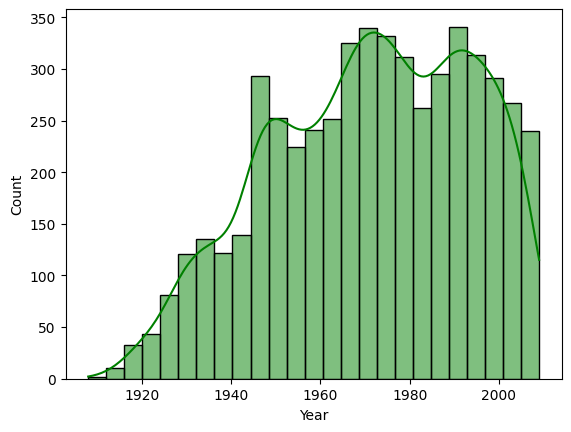

In [12]:
y=np.array(df['Date'])
for i in range(len(y)):
    y[i]=int(y[i][6:])
sns.histplot(y,color='green',kde=True,cbar_ax=True)
plt.xlabel('Year')
df.insert(loc=1,column='Year',value=y)

<ipython-input-13-737c740e3234>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Year']).sum()[['Fatalities','Aboard']].plot()


<Axes: xlabel='Year'>

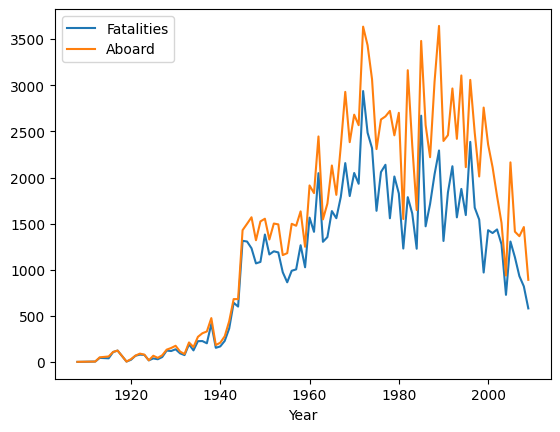

In [13]:
df.groupby(['Year']).sum()[['Fatalities','Aboard']].plot()

In [14]:
# country-wise analysis
def lastWord(string):
    lis = list(str(string).split(" "))
    length = len(lis)
    return lis[length-1]
locations=np.array(df['Location'])
countries=[]
for i in locations:
    countries.append(lastWord(i))
countries=pd.DataFrame({'Region':countries,'count':np.ones(len(countries))})

<Axes: xlabel='count', ylabel='Region'>

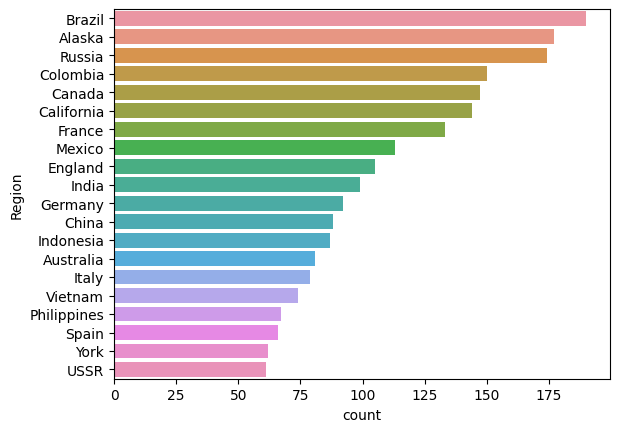

In [15]:
countries_df=countries.groupby('Region').count().sort_values('count',ascending=False)
sns.barplot(x=countries_df['count'][:20],y=countries_df.index[:20])

Text(0.5, 0, 'Crashes')

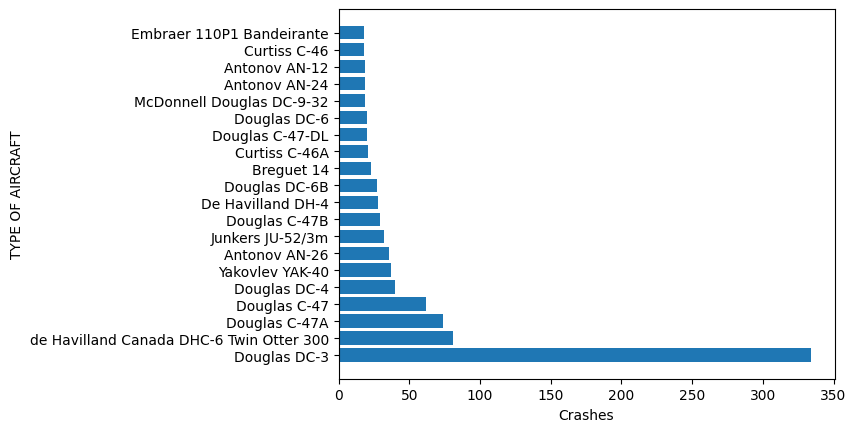

In [16]:
type_count=df.groupby(['Type']).count().sort_values('index',ascending=False)
tc_x=type_count.index
tc_y=type_count['index']
plt.barh(tc_x[:20],tc_y[:20])
plt.ylabel('TYPE OF AIRCRAFT')
plt.xlabel('Crashes')

In [17]:
##note there are plenty of missing entries in the time feature of the dataset
##supposedly because of indeterminate nature of accidents mid-air

time_df=pd.DataFrame(df.groupby(['Time']).count().sort_values('index',ascending=False)['index'])
times=np.array(time_df.index)
crash_times=[]
for i in range(len(times)):
    if(times[0]=='c'):
        times[i]=times[i][3:5]
    else:
        times[i]=times[i][:2]
        crash_times.append(times[i][:2])

Text(0.5, 0, 'Crashes')

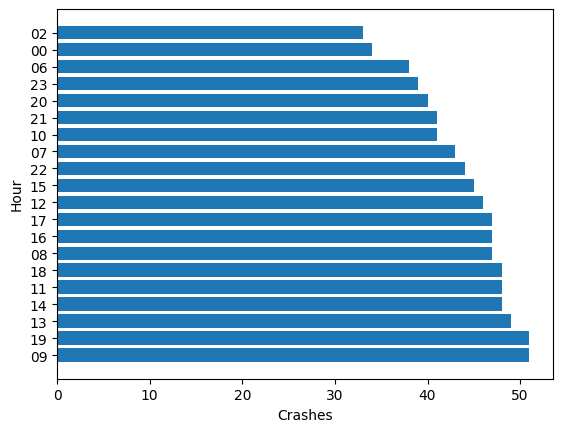

In [18]:
times=pd.DataFrame({'Hour':crash_times,'count':np.ones(len(crash_times))})
total_by_hour=times.groupby('Hour').count().sort_values('count',ascending=False)
plt.barh(total_by_hour[:20].index,total_by_hour[:20]['count'])
plt.ylabel('Hour')
plt.xlabel('Crashes')

Text(0, 0.5, 'Crashes')

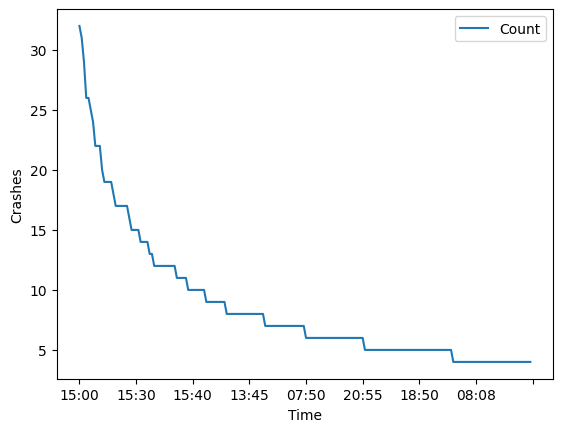

In [19]:
time_df=pd.DataFrame(df.groupby(['Time']).count().sort_values('index',ascending=False)['index'])
time_df.rename({'index':'Count'},axis='columns',inplace=True)
time_df[:200].plot()
plt.ylabel('Crashes')